In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'loan.csv')

C:\Users\Srijon Mallick\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.shape

(42542, 111)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(86), object(25)
memory usage: 36.0+ MB


In [5]:
data_dict_all=pd.read_excel('LCDataDictionary.xlsx',sheet_name='LoanStats')

In [6]:
data_dict=data_dict_all.iloc[:,0:2]
data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [7]:
data_dtypes=pd.DataFrame(data.dtypes,columns=['dtype'])
data_dtypes.reset_index(inplace=True)
data_dtypes.columns=['LoanStatNew', 'dtype']
data_dtypes['first value'] = data.loc[0].values

In [8]:
data_dtypes.head()

,LoanStatNew,dtype,first value
0,id,object,1077501
1,member_id,float64,1296599.0
2,loan_amnt,float64,5000.0
3,funded_amnt,float64,5000.0
4,funded_amnt_inv,float64,4975.0


In [9]:
data_col=data_dtypes.merge(data_dict, on='LoanStatNew',how='left')

In [10]:
data_col.head()

,LoanStatNew,dtype,first value,Description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000.0,The listed amount of the loan applied for by t...
3,funded_amnt,float64,5000.0,The total amount committed to that loan at tha...
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for th...


In [11]:
d={'LoanStatNew':[],'Nulls':[]}
for i in data.columns:
    d['LoanStatNew'].append(i)
    d['Nulls'].append(len(data[data[i].isnull()][i]))
data_col=data_col.merge(pd.DataFrame(d),on='LoanStatNew')
nulls=pd.DataFrame(d)

In [12]:
data_col.head()

,LoanStatNew,dtype,first value,Description,Nulls
0,id,object,1077501,A unique LC assigned ID for the loan listing.,4
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.,7
2,loan_amnt,float64,5000.0,The listed amount of the loan applied for by t...,7
3,funded_amnt,float64,5000.0,The total amount committed to that loan at tha...,7
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for th...,7


In [13]:
data_y=data['loan_status']
data_y.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [14]:
data_y.value_counts()

Fully Paid                                             34085
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                   19
Late (31-120 days)                                         9
In Grace Period                                            8
Late (16-30 days)                                          2
Default                                                    1
Name: loan_status, dtype: int64

In [15]:
paid=['Fully Paid','Does not meet the credit policy. Status:Fully Paid']
data['loan_status']=data['loan_status'].apply(lambda x: 'Fully Paid' if x in paid else x)

In [16]:
default=['Charged Off','Late (31-120 days)','Late (16-30 days)','Does not meet the credit policy. Status:Charged Off',
         'In Grace Period','Default']
data['loan_status']=data['loan_status'].apply(lambda x: 'Default' if x in default else x)

In [17]:
data_y.value_counts()

Fully Paid    36073
Default        6443
Current          19
Name: loan_status, dtype: int64

In [18]:
data=data[(data['loan_status']=='Default') | (data['loan_status']=='Fully Paid')]

In [19]:
# Data is skewed in the ratio of 15.2/84.8
data['loan_status'].value_counts()[0]/len(data['loan_status'])

0.8484570514629787

In [20]:
data[['loan_amnt','loan_status']].groupby(by='loan_status').mean()

,loan_amnt
loan_status,
Default,11852.611361
Fully Paid,10951.009065


C:\Users\Srijon Mallick\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

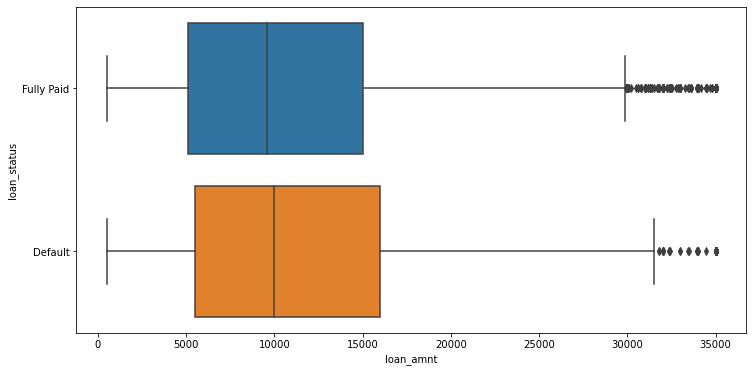

In [21]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data['loan_amnt'],data['loan_status'])

<AxesSubplot:xlabel='loan_status'>

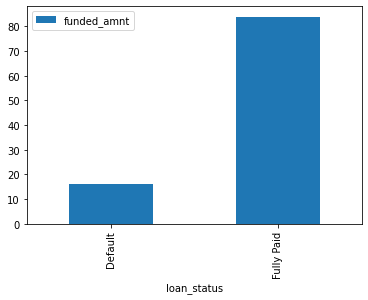

In [22]:
total_funded_amnt=data['funded_amnt'].sum()
(data[['funded_amnt','loan_status']].groupby(by='loan_status').\
         sum()/total_funded_amnt*100).plot(kind='bar')

**Cleaning Part 1**

In [23]:
data_col[0:13]

,LoanStatNew,dtype,first value,Description,Nulls
0,id,object,1077501,A unique LC assigned ID for the loan listing.,4
1,member_id,float64,1296599.0,A unique LC assigned Id for the borrower member.,7
2,loan_amnt,float64,5000.0,The listed amount of the loan applied for by t...,7
3,funded_amnt,float64,5000.0,The total amount committed to that loan at tha...,7
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for th...,7
5,term,object,36 months,The number of payments on the loan. Values are...,7
6,int_rate,object,10.65%,Interest Rate on the loan,7
7,installment,float64,162.87,The monthly payment owed by the borrower if th...,7
8,grade,object,B,LC assigned loan grade,7
9,sub_grade,object,B2,LC assigned loan subgrade,7


In [24]:
#'grade' and 'sub_grade' gives same information
data.drop(['id','member_id','funded_amnt','funded_amnt_inv','installment','sub_grade','emp_title'],axis=1,inplace=True)

In [25]:
data.shape

(42516, 104)

In [26]:
data_col[13:26]

,LoanStatNew,dtype,first value,Description,Nulls
13,annual_inc,float64,24000.0,The self-reported annual income provided by th...,11
14,verification_status,object,Verified,"Indicates if income was verified by LC, not ve...",7
15,issue_d,object,11-Dec,The month which the loan was funded,7
16,loan_status,object,Fully Paid,Current status of the loan,7
17,pymnt_plan,object,n,Indicates if a payment plan has been put in pl...,7
18,url,object,https://lendingclub.com/browse/loanDetail.acti...,URL for the LC page with listing data.,7
19,desc,object,Borrower added on 12/22/11 > I need to upgra...,Loan description provided by the borrower,13300
20,purpose,object,credit_card,A category provided by the borrower for the lo...,7
21,title,object,Computer,The loan title provided by the borrower,20
22,zip_code,object,860xx,The first 3 numbers of the zip code provided b...,7


In [27]:
data.drop(['url','desc','title','zip_code'],axis=1,inplace=True)
#Info in 'title' and 'purpose' is same

In [28]:
data.shape

(42516, 100)

In [29]:
data_col[26:39]

,LoanStatNew,dtype,first value,Description,Nulls
26,earliest_cr_line,object,Jan-85,The month the borrower's earliest reported cre...,36
27,inq_last_6mths,float64,1.0,The number of inquiries in past 6 months (excl...,36
28,mths_since_last_delinq,float64,NaN,The number of months since the borrower's last...,26933
29,mths_since_last_record,float64,NaN,The number of months since the last public rec...,38891
30,open_acc,float64,3.0,The number of open credit lines in the borrowe...,36
31,pub_rec,float64,0.0,Number of derogatory public records,36
32,revol_bal,float64,13648.0,Total credit revolving balance,7
33,revol_util,object,83.70%,"Revolving line utilization rate, or the amount...",97
34,total_acc,float64,9.0,The total number of credit lines currently in ...,36
35,initial_list_status,object,f,The initial listing status of the loan. Possib...,7


In [30]:
data.drop(['mths_since_last_delinq','mths_since_last_record','out_prncp','out_prncp_inv','total_pymnt'],
          axis=1,inplace=True)

In [31]:
data.shape

(42516, 95)

In [32]:
data_col[39:52]

,LoanStatNew,dtype,first value,Description,Nulls
39,total_pymnt_inv,float64,5833.84,Payments received to date for portion of total...,7
40,total_rec_prncp,float64,5000.0,Principal received to date,7
41,total_rec_int,float64,863.16,Interest received to date,7
42,total_rec_late_fee,float64,0.0,Late fees received to date,7
43,recoveries,float64,0.0,post charge off gross recovery,7
44,collection_recovery_fee,float64,0.0,post charge off collection fee,7
45,last_pymnt_d,object,15-Jan,Last month payment was received,90
46,last_pymnt_amnt,float64,171.62,Last total payment amount received,7
47,next_pymnt_d,object,NaN,Next scheduled payment date,39754
48,last_credit_pull_d,object,16-Dec,The most recent month LC pulled credit for thi...,11


In [33]:
data.drop(['total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
          'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
           'collections_12_mths_ex_med','policy_code','mths_since_last_major_derog'],
          axis=1,inplace=True)

In [34]:
data.shape

(42516, 82)

In [35]:
data_col[52:]

,LoanStatNew,dtype,first value,Description,Nulls
52,application_type,object,INDIVIDUAL,Indicates whether the loan is an individual ap...,7
53,annual_inc_joint,float64,NaN,The combined self-reported annual income provi...,42542
54,dti_joint,float64,NaN,A ratio calculated using the co-borrowers' tot...,42542
55,verification_status_joint,float64,NaN,NaN,42542
56,acc_now_delinq,float64,0.0,The number of accounts on which the borrower i...,36
57,tot_coll_amt,float64,NaN,Total collection amounts ever owed,42542
58,tot_cur_bal,float64,NaN,Total current balance of all accounts,42542
59,open_acc_6m,float64,NaN,Number of open trades in last 6 months,42542
60,open_il_6m,float64,NaN,Number of currently active installment trades,42542
61,open_il_12m,float64,NaN,Number of installment accounts opened in past ...,42542


In [36]:
# Drop any column with more than 50% missing values
data = data.dropna(thresh=(len(data)/2),axis=1) 

In [37]:
#pd.set_option("display.max_rows", None)
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [38]:
#data['tax_liens'].value_counts()
data.drop(['earliest_cr_line', 'inq_last_6mths','pub_rec', 'revol_bal', 'acc_now_delinq','revol_util',
           'initial_list_status','pub_rec_bankruptcies','chargeoff_within_12_mths','tax_liens'],
          axis=1,inplace=True)

In [39]:
data.shape

(42516, 19)

In [40]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'open_acc', 'total_acc', 'application_type',
       'delinq_amnt'],
      dtype='object')

**Cleaning Part 2**

In [41]:
nulls_percent=[]
for i in data.columns:
    tmp=len(data[data[i].isnull()])/len(data)*100
    nulls_percent.append(round(tmp,2))
null_df=pd.DataFrame(data=nulls_percent,index=data.columns,columns=['% Nulls'])
null_df[null_df['% Nulls']!=0]

,% Nulls
emp_length,2.61
annual_inc,0.01
delinq_2yrs,0.07
open_acc,0.07
total_acc,0.07
delinq_amnt,0.07


In [42]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [43]:
def encode_emp_length(x):
    if type(x)==float: #Check for nan ,as only Nans are float while other values are str
        return 0 # nan will be replaced with zero
    if x=='10+ years':
        return 10
    if x=='< 1 year':
        return 0
    else:
        return int(x.split(' ')[0])
    
data['emp_length']=data['emp_length'].apply(encode_emp_length)

In [44]:
data['emp_length'].value_counts()

10    9366
0     6171
2     4741
3     4362
4     3645
1     3592
5     3458
6     2374
7     1875
8     1591
9     1341
Name: emp_length, dtype: int64

In [45]:
data['term'].unique() #Term column has two unique data so for better accessiblity later converted it to binary values.

array([' 36 months', ' 60 months'], dtype=object)

In [46]:
def encode_term(x):
    if x==' 36 months':
        return int(36)
    if x==' 60 months':
        return int(60)

data['term']=data['term'].apply(encode_term)

In [47]:
data['term'].unique() #Term column has two unique data so for better accessiblity later converted it to binary values.

array([36, 60], dtype=int64)

In [48]:
data['grade'].value_counts()

B    12385
A    10183
C     8736
D     6011
E     3390
F     1299
G      512
Name: grade, dtype: int64

In [49]:
def encode_grade(x):
    if x=='A':
        return 1
    if x=='B':
        return 2
    if x=='C':
        return 3
    if x=='D':
        return 4
    if x=='E':
        return 5
    if x=='F':
        return 6
    if x=='G':
        return 7
    
data['grade']=data['grade'].apply(encode_grade)

In [50]:
data['grade'].unique()

array([2, 3, 1, 5, 6, 4, 7], dtype=int64)

In [51]:
data['home_ownership'].value_counts()

RENT        20169
MORTGAGE    18952
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

C:\Users\Srijon Mallick\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

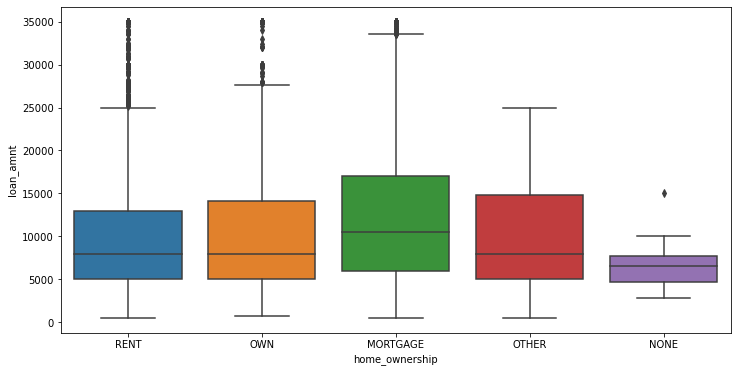

In [52]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data['home_ownership'],data['loan_amnt'])

In [53]:
#Change OTHER, NONE to RENT as these data points are too low.
data['home_ownership']=data['home_ownership'].apply(lambda x: 'RENT' if x in ['OTHER','NONE'] else x)

In [54]:
# rent =1, mortgage=2, own=3
def encode_home(x):
    if x=='RENT':
        return 1
    if x=='MORTGAGE':
        return 2
    if x=='OWN':
        return 3
    
data['home_ownership']=data['home_ownership'].apply(encode_home)

In [55]:
data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [56]:
# Not verified=0, verified=1, source verified=2
def encode_status(x):
    if x=='Not Verified':
        return 0
    if x=='Verified':
        return 1
    if x=='Source Verified':
        return 2
    
data['verification_status']=data['verification_status'].apply(encode_status)

In [57]:
data['int_rate'].value_counts()

10.99%    970
11.49%    837
13.49%    832
7.51%     787
7.88%     742
         ... 
17.46%      1
21.48%      1
24.40%      1
16.83%      1
16.20%      1
Name: int_rate, Length: 394, dtype: int64

In [58]:
def encode_int_rate(x):
    x=x.rstrip(x[-1])
    return float(x)

data['int_rate']=data['int_rate'].apply(encode_int_rate)

In [59]:
data.drop('pymnt_plan',axis=1,inplace=True)

In [60]:
data.shape

(42516, 18)

In [61]:
#data['purpose'].nunique()
data['purpose'].value_counts()

debt_consolidation    19766
credit_card            5474
other                  4423
home_improvement       3198
major_purchase         2310
small_business         1990
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

C:\Users\Srijon Mallick\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='loan_amnt'>

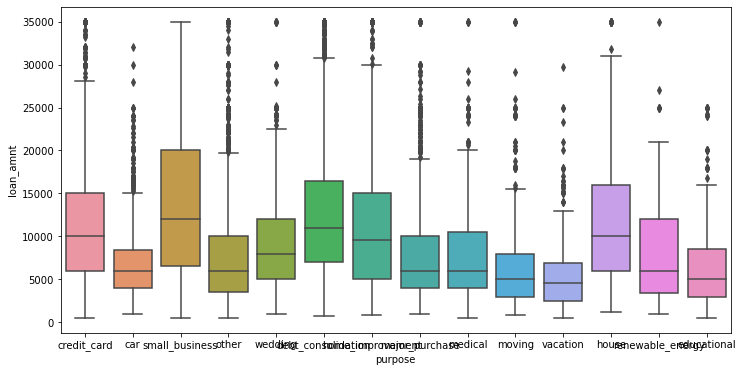

In [62]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data['purpose'],data['loan_amnt'])

In [63]:
def encode_purpose(x):
    if x=="debt_consolidation":
        return int(1)
    if x=="credit_card":
        return int(2)
    if x=="other":
        return int(3)
    if x=="home_improvement":
        return int(4)
    if x=="major_purchase":
        return int(5)
    if x=="small_business":
        return int(6)
    if x=="car":
        return int(7)
    if x=="wedding":
        return int(8)
    if x=="medical":
        return int(9)
    if x=="moving":
        return int(10)
    if x=="house":
        return int(11)
    if x=="educational":
        return int(12)
    if x=="vacation":
        return int(13)
    if x=="renewable_energy":
        return int(14)

    
data['purpose']=data['purpose'].apply(encode_purpose)

In [64]:
#data['application_type'].value_counts()
data.drop('application_type',axis=1,inplace=True)
data.drop('issue_d',axis=1,inplace=True)
data.drop('addr_state',axis=1,inplace=True)

In [65]:
data['loan_status']=data['loan_status'].apply(lambda x: 1 if x=='Default' else 0)

In [66]:
data.drop('delinq_2yrs',axis=1,inplace=True)
data.drop('delinq_amnt',axis=1,inplace=True)

In [67]:
data.shape

(42516, 13)

In [68]:
data['open_acc']=data['open_acc'].replace(np.nan, 0)
data['open_acc'].isnull().sum()

0

In [69]:
data['total_acc']=data['total_acc'].replace(np.nan, 0)
data['total_acc'].isnull().sum()

0

In [70]:
#data['annual_inc']=data['annual_inc'].replace(np.nan, 0)  index=42536,42483,42452,42453

data.drop([42452,42453,42483,42536],inplace=True)
#data.drop(index=42453, columns='annual_inc')
#data.drop(index=42483, columns='annual_inc')
#data.drop(index=42536, columns='annual_inc')

#data['annual_inc'].isnull().sum()
data.shape

(42512, 13)

In [71]:
data.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,total_acc
0,5000.0,36,10.65,2,10,1,24000.0,1,0,2,27.65,3.0,9.0
1,2500.0,60,15.27,3,0,1,30000.0,2,1,7,1.00,3.0,4.0
2,2400.0,36,15.96,3,10,1,12252.0,0,0,6,8.72,2.0,10.0
3,10000.0,36,13.49,3,10,1,49200.0,2,0,3,20.00,10.0,37.0
5,5000.0,36,7.90,1,3,1,36000.0,2,0,8,11.20,9.0,12.0


**Modelling**

*DECISION TREE*

In [72]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import load_iris

In [73]:
x=[0,1,2,3,4,5,6,7,9,10,11,12]
X=data.iloc[:,x]
Y=data.iloc[:,8]
Y[0:4]

0    0
1    1
2    0
3    0
Name: loan_status, dtype: int64

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100) # 80% training and 20% test
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7336234270257557


In [75]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))

[[5934 1218]
 [1047  304]]


In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      7152
           1       0.20      0.23      0.21      1351

    accuracy                           0.73      8503
   macro avg       0.52      0.53      0.53      8503
weighted avg       0.75      0.73      0.74      8503



*RANDOM FOREST*

In [77]:
from sklearn.ensemble import RandomForestClassifier
x=[0,1,2,3,4,5,6,7,9,10,11,12]
#X=data.iloc[:,x]
#Y=data.iloc[:,9]
#Y[0:4]

In [78]:
X=np.array(data.iloc[:,x])
y = np.array(data['loan_status'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Accuracy', accuracy)

Accuracy 0.8458191226625896


In [79]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[7177   34]
 [1277   15]]


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      7211
           1       0.31      0.01      0.02      1292

    accuracy                           0.85      8503
   macro avg       0.58      0.50      0.47      8503
weighted avg       0.77      0.85      0.78      8503

